## Preparation

Все нужные либы и проверка в какой директории работаем

Эту ячеку надо выполнять только в первый раз для установки всех либ. Лучше создать env

In [1]:
!pip3 install -r ../requirements.txt

from IPython.display import clear_output
clear_output() # если что-то не работает, уберите эту строчку и смотрите на ошибки

Импорт всех либ

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import xlsxwriter
os.getcwd()



'/Users/kirilllalayants/physics/PhysicsITMO_Electrostatics/lab3.10'

Создание эксель файла, в котором потом все сохраним


In [51]:
NAME_OF_EXCEL = 'data.xlsx'
# if not os.path.exists(NAME_OF_EXCEL):
#     xlsxwriter.Workbook(NAME_OF_EXCEL).close()
data_1 = pd.read_excel(NAME_OF_EXCEL, 'table1')
data_2 = pd.read_excel(NAME_OF_EXCEL, 'table2')
table_consts = pd.read_excel(NAME_OF_EXCEL, 'consts')
print(table_consts.shape, data_1.shape, data_2.shape)


(1, 14) (13, 9) (4, 4)


# Обработка

### 1. Вычислить  значения  логарифмического  декремента lambda

In [52]:
data_1

,"Rm, Ohm","T, s","2Ui, ticks","2Ui+n, ticks",N,lambda,Q,"R, Ohm","L, H"
0,10,0.00008,5.2,2.4,2,0.386595,11.668773,92.849228,0.012525
1,20,0.00008,10.0,2.4,3,0.475705,10.236464,102.849228,0.010150
2,30,0.00008,9.6,2.0,3,0.522872,9.687756,112.849228,0.010114
3,40,0.00008,9.2,3.2,2,0.528026,9.634217,122.849228,0.011753
4,50,0.00008,8.8,2.8,2,0.572566,9.215338,132.849228,0.011689
5,60,0.00008,8.4,2.4,2,0.626381,8.796459,142.849228,0.011293
6,70,0.00008,8.0,2.0,2,0.693147,8.377580,152.849228,0.010558
7,80,0.00008,7.6,3.6,1,0.747214,8.100821,162.849228,0.010313
8,90,0.00008,7.2,3.2,1,0.810930,7.829816,172.849228,0.009865
9,100,0.00008,6.8,3.2,1,0.753772,8.070402,182.849228,0.012777


In [53]:
lambd = 1/data_1["N"] * np.log(data_1['2Ui, ticks'] / data_1['2Ui+n, ticks'])
dN = 0.1
dlambd = np.sqrt((1/data_1["N"] / data_1['2Ui, ticks'] * data_1['2Ui+n, ticks'] * 1 /data_1['2Ui+n, ticks'] * dN )**2\
    + (1/data_1["N"] / data_1['2Ui, ticks'] * data_1['2Ui+n, ticks'] * data_1['2Ui, ticks']/data_1['2Ui+n, ticks']**2 * dN )**2)                     

data_1['lambda'] = lambd
data_1["dlabmda"] = dlambd

 
0.004438 x + 0.3677


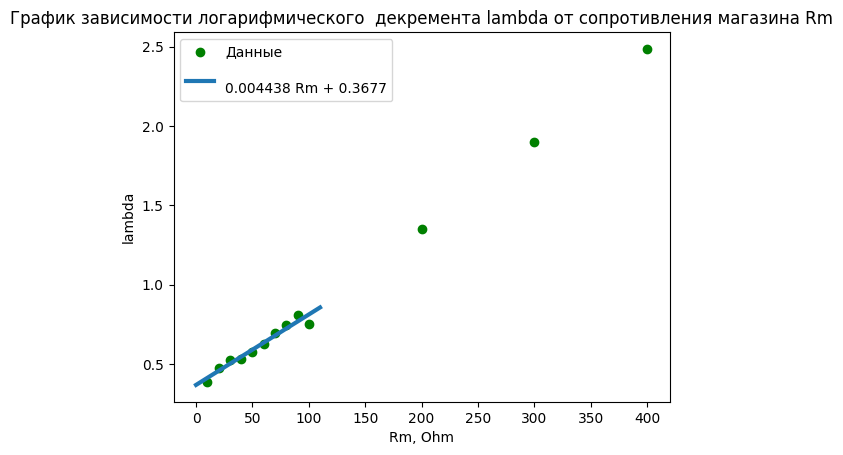

In [54]:
plt.scatter(data_1["Rm, Ohm"], data_1["lambda"],
            label="Данные", color='g', linewidth=1)


# print(data_1["Rm, Ohm"].iloc[0:10])
fit = np.polyfit(data_1["Rm, Ohm"].iloc[0:10], data_1["lambda"].iloc[0:10], 1)
line = np.poly1d(fit)
x = np.linspace(0, 110)

plt.plot(x, line(x), label=f"{line}".replace('x', 'Rm'), linewidth=3)

R0 = abs(fit[1]/fit[0])

plt.xlabel("Rm, Ohm")
plt.ylabel("lambda")
plt.title("График зависимости логарифмического  декремента lambda от сопротивления магазина Rm")
plt.legend()
print(line)


In [55]:
table_consts["R_0, Ohm"] = R0
R0

82.84922800626234

Вычисление общего сопротивления и индуктивности для R = 10...100 Ом 

In [56]:
R = R0 + data_1["Rm, Ohm"]
data_1["R, Ohm"] = R

L = (np.pi * data_1["R, Ohm"].iloc[0:13].to_numpy()) ** 2 * \
    table_consts["C1, F"].to_numpy() / data_1["lambda"].iloc[0:13].to_numpy() ** 2

dL = np.sqrt((L/lambd * dlambd)**2)
data_1["L, H"] = L
data_1["dL, H"] = dL

L_mean = L.mean()
table_consts["L_mean, H"] = L_mean


Вычисление добротности

Text(0.5, 1.0, 'График зависимости добротности Q от сопротивления R')

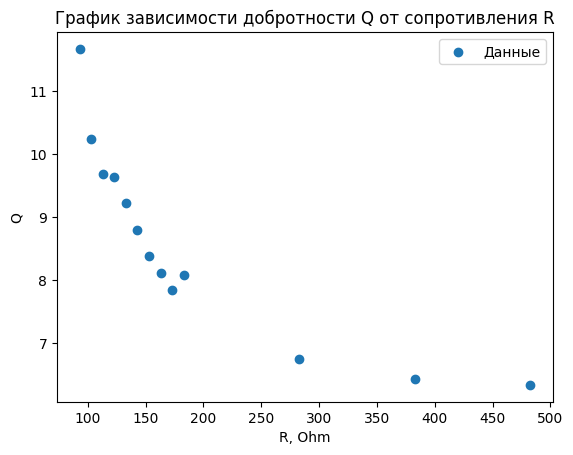

In [57]:
Q = 2 * np.pi/(1-np.exp(-2 * data_1["lambda"].iloc[0:13].to_numpy()))
dQ = np.sqrt((Q / (1-np.exp(-2 * data_1["lambda"].iloc[0:13].to_numpy())) * -2 * data_1["lambda"].iloc[0:13].to_numpy() * np.exp(-2 * data_1["lambda"].iloc[0:13].to_numpy()) * dlambd)**2)
data_1["Q"] = Q
data_1["dQ"] = dQ

# Q_for_lowR = 1 / data_1["R, Ohm"].iloc[0:1].to_numpy() * np.sqrt(data_1["L, H"].iloc[0:1].to_numpy() / table_consts["C1, F"].to_numpy())
# print((Q[0] - Q_for_lowR)/Q[0])

# fit = np.polyfit(Q, data_1["Rm, Ohm"], 1 )
# line = np.poly1d(fit)
# x = np.linspace(0, 13)

# plt.plot(line(x), x)

plt.scatter(data_1["R, Ohm"],  Q, label="Данные")
plt.xlabel("R, Ohm")
plt.ylabel("Q")
plt.legend()
plt.title("График зависимости добротности Q от сопротивления R")


In [58]:
R_no_fluctuations = 600
table_consts["R_no_fluctuations, Ohm"] = R_no_fluctuations
R_critical = 2 * np.sqrt(L_mean/table_consts["C1, F"].to_numpy())
print(
    f"R полученное эксперементально = {R_no_fluctuations}\nR_critical = {R_critical.item()}")


R полученное эксперементально = 600
R_critical = 1387.3105436413832


In [59]:
C = data_2["C"].to_numpy()
T_exp = data_2["T_exp, c"].to_numpy()
T_theory = np.pi * 2/np.sqrt(1/(L_mean * C) - R0 ** 2 / (4*L_mean**2))

data_2["T_theory, c"] = T_theory
data_2["deltaT"] = (T_exp - T_theory)/T_theory


##  Сохранение в файл всех новых данных

In [60]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(NAME_OF_EXCEL)

data_1.to_excel(writer, index=False, sheet_name='table1')
data_2.to_excel(writer, index=False, sheet_name='table2')
table_consts.to_excel(writer, index=False, sheet_name='consts')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/var/folders/4m/cdm9j52s2fs9_8ccjqtb1sy00000gn/T/ipykernel_22055/1270109265.py:9: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
